In [1]:
import pandas as pd
import pyBigWig
# import actc_seq
import tqdm
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import Counter
from pylab import rcParams

In [2]:
def standardize_chromosome(chromosome):
    chromosome = str(chromosome).replace('.0', '')
    if not chromosome.startswith('chr'):
        chromosome = 'chr' + chromosome
    return chromosome

# Apply the function to the Chromosome column



In [3]:
inpath = '../../Data/CleanedExternalData/'
NewDatasetCombine = pd.read_csv(inpath + 'DatasetCombineCleaned_v3.csv', low_memory=False)
UniqueNewDatasetCombine = NewDatasetCombine[['Target Gene Symbol', 'chromosome', 
       'sgRNA Context Sequence', 'sgRNA \'Cut\' Position']].drop_duplicates()

processedCRISPRiOutpath = '../../Data/DHS/SectionedCRISPRi/'
UniqueNewDatasetCombine['chromosome'] = UniqueNewDatasetCombine['chromosome'].apply(standardize_chromosome)
UniqueNewDatasetCombine['chromosome'] = UniqueNewDatasetCombine['chromosome'].replace('chr24','chrY')
UniqueNewDatasetCombine['chromosome'] = UniqueNewDatasetCombine['chromosome'].replace('chr23','chrX')
UniqueNewDatasetCombine = UniqueNewDatasetCombine.drop_duplicates()

In [4]:
#UniqueNewDatasetCombine.to_csv(f'{processedCRISPRiOutpath}uniqueCRISPRiSeqAndPos.csv')

In [5]:
UniqueNewDatasetCombine.head(3)

,Target Gene Symbol,chromosome,sgRNA Context Sequence,sgRNA 'Cut' Position
0,ACTR6,chr12,TGCTTCGAGCACATAGAGGGATCTGGGCCC,100198288.0
1,ACTR6,chr12,CTGCTTCGAGCACATAGAGGGATCTGGGCC,100198289.0
2,ACTR6,chr12,GTCCACCTGCTTCGAGCACATAGAGGGATC,100198295.0


In [6]:
#divide by gene for CRISPRi
for grp, each_csv in UniqueNewDatasetCombine.groupby(['Target Gene Symbol','chromosome']):
    each_csv[['sgRNA Context Sequence', 'sgRNA \'Cut\' Position']].to_csv(f"{processedCRISPRiOutpath}{grp[1]}_{grp[0]}.csv", 
                                                       index = False)

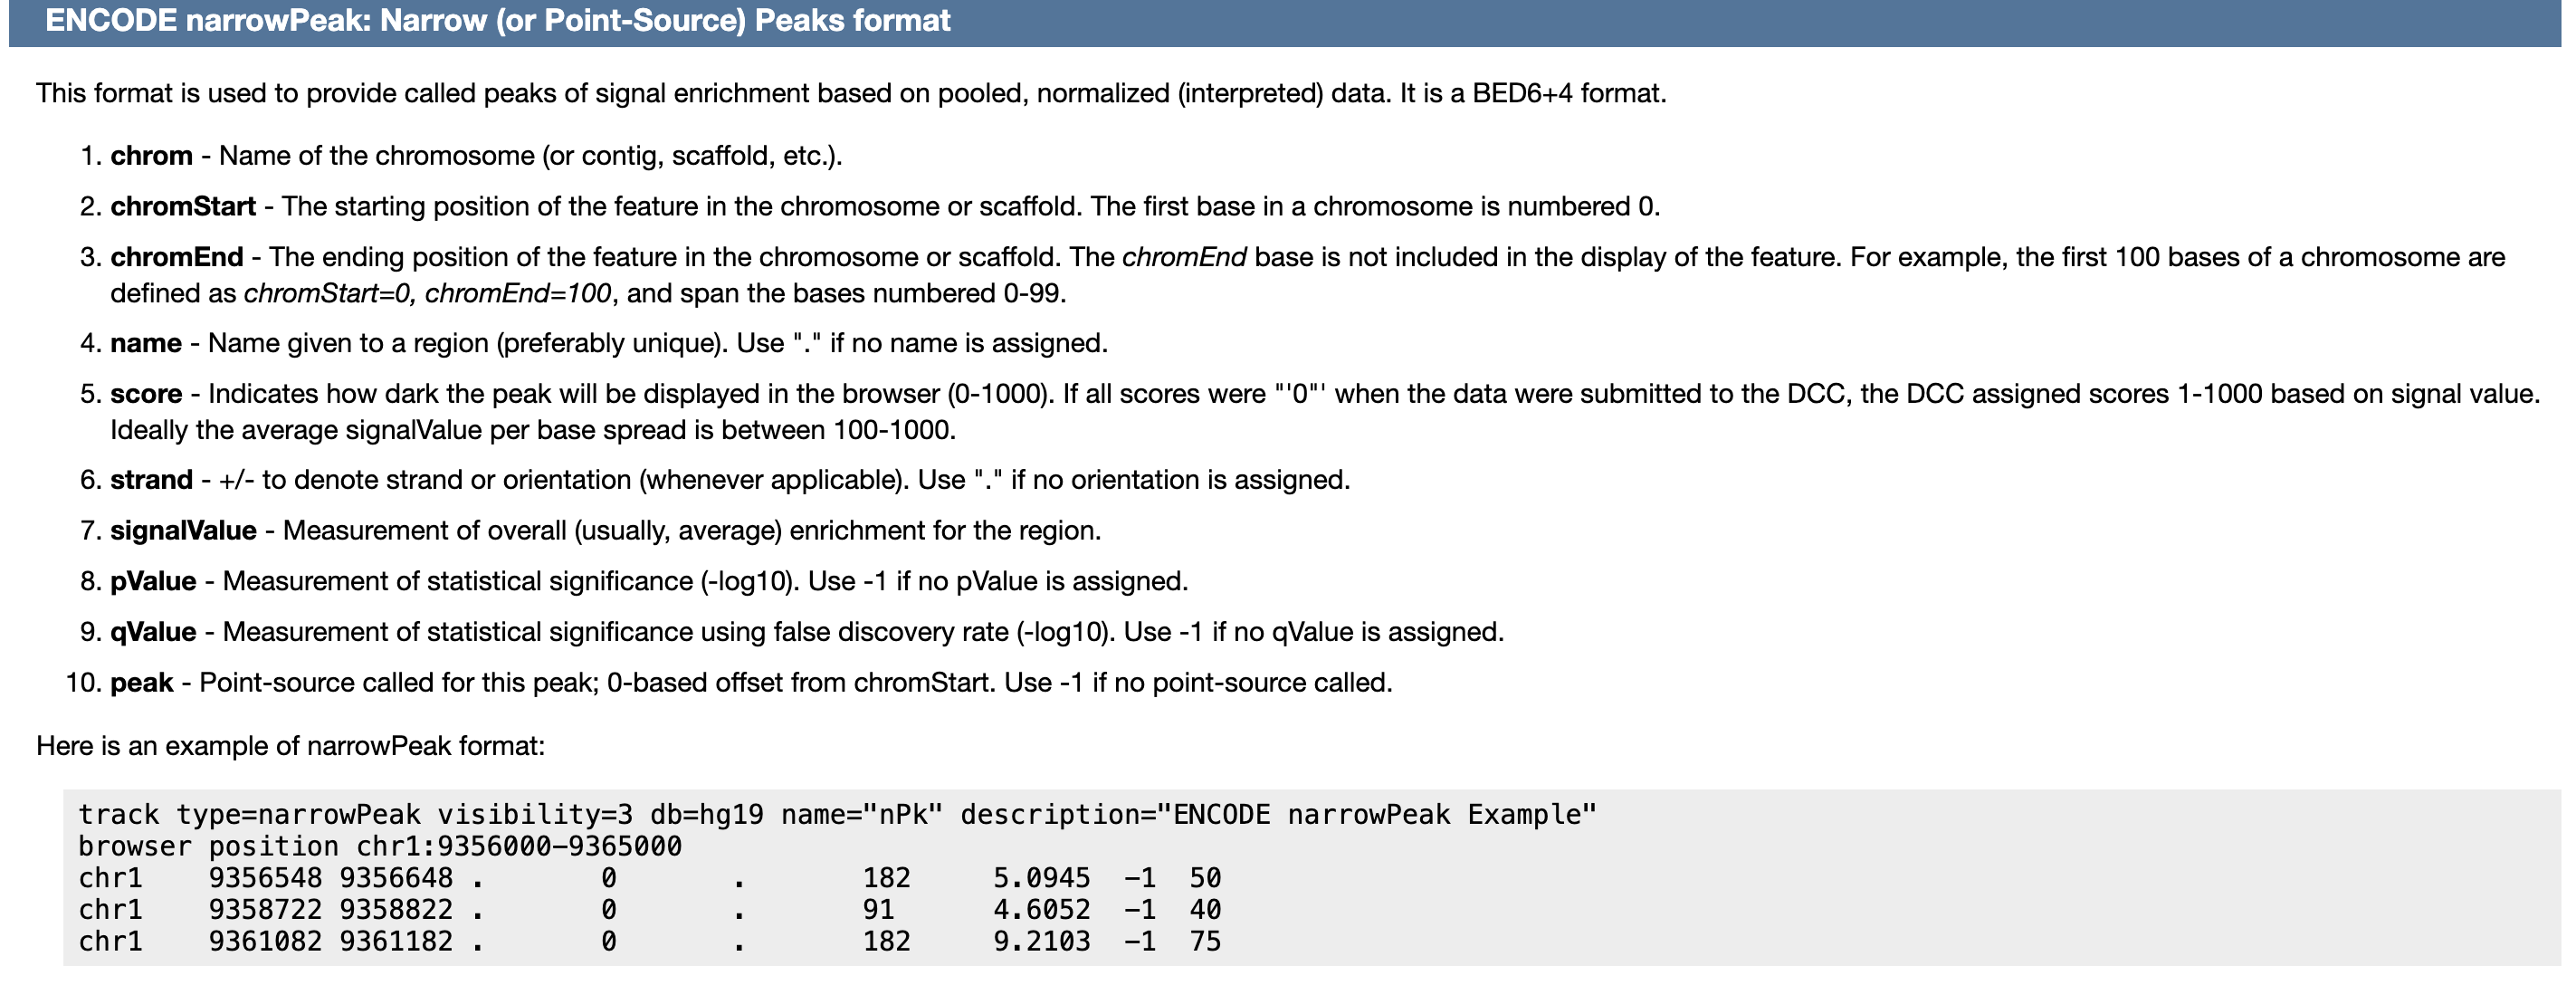

used the following command line to combine replicates in Comp Data Sets
- cat replicate1.bed replicate2.bed | sort -k1,1 -k2,2n > combined_peaks.bed
- bedtools merge -i combined_peaks.bed > merged_peaks.bed

In [7]:
#DHS data downloaded from ENCODE
DHS_path = '/../../../../../../../../Comp Data Sets/DHS/Human-hg38/Cell line specific/'

In [8]:
merged_peaks_HCT116 = []
with open(DHS_path+"HCT116/FDR5/merged_peaks.bed")as f:
    for line in f:
        merged_peaks_HCT116.append(line.strip().split())

In [9]:
merged_peaks_A549 = []
with open(DHS_path+"A549/FDR5/merged_peaks.bed")as f:
    for line in f:
        merged_peaks_A549.append(line.strip().split())

In [10]:
merged_peaks_K562 = []
with open(DHS_path+"K562/FDR5/merged_peaks.bed")as f:
    for line in f:
        merged_peaks_K562.append(line.strip().split())

In [11]:
merged_peaks_K562 = pd.DataFrame(merged_peaks_K562)
# merged_peaks_K562[0] = merged_peaks_K562[0].replace('chr24','chrY')
# merged_peaks_K562[0] = merged_peaks_K562[0].replace('chr23','chrX')

merged_peaks_A549 = pd.DataFrame(merged_peaks_A549)
# merged_peaks_A549[0] = merged_peaks_A549[0].replace('chr24','chrY')
# merged_peaks_A549[0] = merged_peaks_A549[0].replace('chr23','chrX')


merged_peaks_HCT116 = pd.DataFrame(merged_peaks_HCT116)
# merged_peaks_HCT116[0] = merged_peaks_HCT116[0].replace('chr24','chrY')
# merged_peaks_HCT116[0] = merged_peaks_HCT116[0].replace('chr23','chrX')


In [12]:
#divide by gene for CRISPRi

dhs_out = '../../Data/DHS/SectionedDHS/'

for grp, each_csv in merged_peaks_HCT116.groupby(0):
    each_csv = each_csv.rename(columns = {1: 'start', 2: 'end'})
    each_csv[['start','end']].to_csv(f"{dhs_out}HCT116/{grp}.csv", index = False)
for grp, each_csv in merged_peaks_A549.groupby(0):
    each_csv = each_csv.rename(columns = {1: 'start', 2: 'end'})
    each_csv[['start','end']].to_csv(f"{dhs_out}A549/{grp}.csv", index = False)
for grp, each_csv in merged_peaks_K562.groupby(0):
    each_csv = each_csv.rename(columns = {1: 'start', 2: 'end'})
    each_csv[['start','end']].to_csv(f"{dhs_out}K562/{grp}.csv", index = False)


In [13]:
UniqueNewDatasetCombine['chromosome'].value_counts()

chr1     16342
chr17    13297
chr11    12596
chr2     11147
chr19    10826
chr9     10015
chr10     8802
chr12     8275
chr6      8074
chr8      7778
chr3      7237
chr20     6306
chr14     6155
chr5      6085
chr16     5408
chr7      5081
chr4      4389
chr15     3987
chr13     3620
chrX      3307
chr22     2976
chr18     2484
chr21     1522
chrY       915
Name: chromosome, dtype: int64

In [14]:
merged_peaks_HCT116[0].value_counts()

chr1     9422
chr2     7868
chr3     6351
chr6     6282
chr4     5592
chr5     5435
chr7     5259
chr12    5250
chr11    4830
chr10    4807
chr8     4738
chr17    4543
chr9     4023
chr19    3813
chr16    3217
chr14    3106
chr15    2998
chrX     2843
chr20    2576
chr13    2420
chr18    2013
chr22    1810
chr21     945
chrY       64
Name: 0, dtype: int64

In [15]:
merged_peaks_A549[0].value_counts()

chr1     17418
chr2     16611
chr3     12341
chr5     11322
chr12    11198
chr6     11155
chr7     10617
chr4      9871
chr10     9666
chr8      9643
chr11     9545
chr17     9286
chr9      8651
chr19     7512
chrX      6853
chr15     6848
chr16     6550
chr14     6418
chr20     5761
chr13     4857
chr18     4104
chr22     3347
chr21     1920
chrY       373
Name: 0, dtype: int64

In [16]:
UniqueNewDatasetCombine[UniqueNewDatasetCombine['sgRNA Context Sequence'] == 'GGAAAAAAATTGTCAAAAGTACTCCGGGAA']

,Target Gene Symbol,chromosome,sgRNA Context Sequence,sgRNA 'Cut' Position
40375,POP5,chr12,GGAAAAAAATTGTCAAAAGTACTCCGGGAA,120580743.0
